In [ ]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import plotly.express as px
import pandas as pd

In [ ]:
!apt-get install vtk6
!apt-get install python-vtk
!pip install numpy vtk pyqt5
!pip install scipy jupyter ipywidgets ipyevents
!pip install mayavi

# env
!apt-get install -qq xvfb
import os     #For interacting with the Operating System
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
#Define environmental variable using os.environ object
os.environ['DISPLAY'] = ':99'
import panel as pn
pn.extension('vtk') #for interacting with complex 3D geometry

from mayavi import mlab

In [ ]:
mlab.init_notebook('png', 800, 800)

Notebook initialized with png backend.


In [ ]:
files = [
    "flow_t0008",
    "flow_t0048",
    "flow_t0088",
    "flow_t0128",
    "flow_t0168",
    "flow_t0208",
    "flow_t0248",
    "flow_t0288",
    "flow_t0328",
    "flow_t0368",
    "flow_t0408",
    "flow_t0448",
    "flow_t0488",
    "flow_t0528",
    "flow_t0568",
    "flow_t0608",
    "flow_t0648",
    "flow_t0688",
    "flow_t0728",
    "flow_t0768",
    "flow_t0808",
    "flow_t0848",
    "flow_t0888",
    "flow_t0928",
    "flow_t0968",
    "flow_t1008",
    "flow_t1048",
    "flow_t1088",
    "flow_t1128",
    "flow_t1168",
    "flow_t1208",
    "flow_t1248",
    "flow_t1288",
    "flow_t1328",
    "flow_t1368",
    "flow_t1408",
    "flow_t1448",
    "flow_t1488",
    "flow_t1528",
    "flow_t1568",
    "flow_t1608",
    "flow_t1648",
    "flow_t1688",
    "flow_t1728",
    "flow_t1768",
    "flow_t1808",
    "flow_t1848",
    "flow_t1888",
    "flow_t1928",
    "flow_t1968",
    "flow_t2008",
    "flow_t2048",
    "flow_t2088",
    "flow_t2128",
    "flow_t2168",
    "flow_t2208",
    "flow_t2248",
    "flow_t2288",
    "flow_t2328",
    "flow_t2368",
    "flow_t2408",
    "flow_t2448",
    "flow_t2488",
    "flow_t2528",
    "flow_t2568",
    "flow_t2608",
    "flow_t2648",
    "flow_t2688",
    "flow_t2728",
    "flow_t2768",
    "flow_t2808",
    "flow_t2848",
    "flow_t2888",
    "flow_t2928",
    "flow_t2968",
    "flow_t3008",
    "flow_t3048",
    "flow_t3088",
    "flow_t3128",
    "flow_t3168",
    "flow_t3208",
    "flow_t3248",
    "flow_t3288",
    "flow_t3328",
    "flow_t3368",
    "flow_t3408",
    "flow_t3448",
    "flow_t3488",
    "flow_t3528",
    "flow_t3568",
    "flow_t3608",
    "flow_t3648",
    "flow_t3688",
    "flow_t3728",
    "flow_t3768",
    "flow_t3808",
    "flow_t3848",
    "flow_t3888",
    "flow_t3928",
    "flow_t3968",
    "flow_t4008",
    "flow_t4048",
]

In [ ]:
class AMFILE:
    def __init__(self, fileobj):
        self.buf = fileobj
    
    def readUntil(self, str):
        for line in self.buf:
            if str in line:
                return line
    
    def getFloatInLine(self, str_data):
        str_data = str_data.decode("utf-8")
        d = []
        for digit in str_data.split():
            dig = digit.rstrip(",")
            dig = dig.lstrip("-")
            if dig.isdigit():
                digit = digit.rstrip(",")
                d.append(float(digit))
        return d
    
    def getIntInLine(self, str_data):
        str_data = str_data.decode("utf-8")
        d = []
        for digit in str_data.split():
            dig = digit.rstrip(",")
            dig = dig.lstrip("-")
            if dig.isdigit():
                digit = digit.rstrip(",")
                d.append(int(digit))
        return d
    
    def readData(self, xn, yn, zn, fSize):
        self.xn = xn
        self.yn = yn
        self.zn = zn
        self.data = [[[[0 for f in range(fSize)] for x in range(xn)] for y in range(yn)] for z in range(zn)]
        self.maxScalar = 0
        self.minScalar = float('inf')
        for z in range(zn):
            for y in range(yn):
                for x in range(xn):
                    for f in range(fSize):
                        self.data[z][y][x][f] = struct.unpack('f', self.buf.read(4))[0]
                        t = self.data[z][y][x]
                        scalar = (t[0] + t[1] + t[2]) / 3
                        if self.maxScalar < scalar:
                            self.maxScalar = scalar
                        if self.minScalar > scalar:
                            self.minScalar = scalar
    
    def writeFile(self, fileName, scalarDataName, vectorDataName):
        data = '''# vtk DataFile Version 2.0\nVolume example\nASCII\nDATASET STRUCTURED_POINTS\nDIMENSIONS {} {} {}\nASPECT_RATIO 1 1 1\nORIGIN 0 0 0\nPOINT_DATA {}\nSCALARS {} float 1\nLOOKUP_TABLE default\n'''.format(self.xn, self.yn, self.zn, self.xn * self.yn * self.zn, scalarDataName)
        tD = [0 for i in range(self.xn * self.yn * self.zn)]
        tV = [0 for i in range(self.xn * self.yn * self.zn * 3)]
        tN = 0
        tVN = 0
        for z in range(self.zn):
            for y in range(self.yn):
                for x in range(self.xn):
                    t = self.data[z][y][x]
                    tD[tN] = "{:.2f}".format((t[0] + t[1] + t[2]) / 3)
                    tV[tVN] = "{:.2f}".format(t[0])
                    tV[tVN + 1] = "{:.2f}".format(t[1])
                    tV[tVN + 2] = "{:.2f}".format(t[2])
                    tN = tN + 1
                    tVN = tVN + 3
                # print(z, y)
        data = data + " ".join(tD)
        data = data + '''\nVECTORS {} float\n'''.format(vectorDataName)
        data = data + " ".join(tV)
        f = open(fileName, "w")
        f.write(data)
        f.close()
    
    def getVector(self, x, y, z):
        return self.data[z][y][x]
    
    def getScalar(self, x, y, z):
        t = self.data[z][y][x]
        return (t[0] + t[1] + t[2]) / 3
    
    def getScalarArray(self, skip = 1):
        tD = np.zeros((int(self.xn / skip), int(self.yn / skip), int(self.zn / skip)))
        tColor = np.zeros((int(self.xn / skip) * int(self.yn / skip) * int(self.zn / skip), 4))
        tU = np.zeros((int(self.xn / skip), int(self.yn / skip), int(self.zn / skip)))
        tV = np.zeros((int(self.xn / skip), int(self.yn / skip), int(self.zn / skip)))
        tW = np.zeros((int(self.xn / skip), int(self.yn / skip), int(self.zn / skip)))
        tx = 0
        ty = 0
        tz = 0
        tn = 0
        tMax = 0
        for z in range(0, self.zn, skip):
            for y in range(0, self.yn, skip):
                for x in range(0, self.xn, skip):
                    t = self.data[z][y][x]
                    tD[tx, ty, tz] = (t[0] + t[1] + t[2]) / 3
                    tColor[tn, 0] = ((t[0] + t[1] + t[2]) / 3 - self.minScalar) / (self.maxScalar - self.minScalar) * 255
                    tColor[tn, 1] = 0
                    tColor[tn, 2] = 255 - ((t[0] + t[1] + t[2]) / 3 - self.minScalar) / (self.maxScalar - self.minScalar) * 255
                    tColor[tn, 3] = ((t[0] + t[1] + t[2]) / 3 - self.minScalar) / (self.maxScalar - self.minScalar) * 255
                    if tColor[tn, 3] < 80:
                        tColor[tn, 3] = 0
                    tU[tx, ty, tz] = t[0]
                    tV[tx, ty, tz] = t[1]
                    tW[tx, ty, tz] = t[2]
                    tx = tx + 1
                    tn = tn + 1
                tx = 0
                ty = ty + 1
            ty = 0
            tz = tz + 1
        return (tD, tU, tV, tW)
    
    def plot(self, skip, a1, a2):
        x, y, z = np.mgrid[:int(self.xn / skip), :int(self.yn / skip), :int(self.zn /skip)]
        x = x.flatten().tolist()
        y = y.flatten().tolist()
        z = z.flatten().tolist()
        tD, u, v, w = self.getScalarArray(skip)
        tD = tD.flatten().tolist()

        d = {'col1': x, 'col2': y, 'col3': z, 'col': tD}
        df = pd.DataFrame(data=d)

        fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='col')
        fig.show()
        # fig = plt.figure()
        # ax = fig.add_subplot(direction, projection='3d')
        # ax = fig.add_subplot(111, projection = '3d')

        # print(tD.shape)
        # ax.scatter(x, y, z, c = tD/255.0)
        # ax.scatter3D(x, y, z, c=tD)
        # ax.view_init(a1, a2) # 90 270
        # plt.show()
    
    def prepData(self):
        #5 => u, v, w, features
        self.groupData = np.zeros((self.xn, self.yn, self.zn, 4))
        for z in range(0, self.zn):
            for y in range(0, self.yn):
                for x in range(0, self.xn):
                    t = self.data[z][y][x]
                    tFeature = 0
                    if x == 0 and y < 32:
                        tFeature = 2
                    elif x == 0 and y >= 32:
                        tFeature = 3
                    elif x == 0:
                        tFeature = 1
                    self.groupData[x, y, z] = [t[0], t[1], t[2], tFeature]

    def prepData0(self):
        #5 => u, v, w, features
        self.groupData = np.zeros((self.xn, self.yn, self.zn, 4))
        for z in range(0, self.zn):
            for y in range(0, self.yn):
                for x in range(0, self.xn):
                    t = self.data[z][y][x]
                    mScalar = self.getScalar(x, y, z)
                    tFeature = 1
                    if mScalar >= 0.229 and y < 32:
                        tFeature = 2
                    elif mScalar >= 0.229 and y >= 32:
                        tFeature = 3
                    self.groupData[x, y, z] = [t[0], t[1], t[2], tFeature]
    
    def getBack(self, X, Y, Z, step):
        maxV = max(abs(self.groupData[X, Y, Z, 0 : 3]))
        direction = ( - self.groupData[X, Y, Z, 0 : 3]) if maxV == 0 else - self.groupData[X, Y, Z, 0 : 3] / maxV * step
        lens = int(step * 2 + 1)
        neigh = []
        xs = int(int(direction[0]) + X)
        ys = int(int(direction[1]) + Y)
        zs = int(int(direction[2]) + Z)
        for x in range(xs, xs + lens):
            for y in range(ys, ys + lens):
                for z in range(zs, zs + lens):
                    if x >= 0 and y >= 0 and z >= 0 and x < self.xn and y < self.yn and z < self.zn and self.groupData[x, y, z, 3] > 0:
                        neigh.append([x, y, z, int(self.groupData[x, y, z, 3])])
        return neigh

    def isSame(self, X, Y, Z, checkCount, e):
        mD = self.groupData[X, Y, Z, 0 : 3]
        mScalar = self.getScalar(X, Y, Z)
        if mScalar < 0.229:
            return 1
        neigh = self.getBack(X, Y, Z, checkCount)
        for n in neigh:
            nD = self.groupData[n[0], n[1], n[2], 0 : 3]
            if nD[0] != 0:
                nD = nD * mD[0] / nD[0]
            elif nD[1] != 0:
                nD = nD * mD[1] / nD[1]
            elif nD[2] != 0:
                nD = nD * mD[2] / nD[2]
            nScalar = self.getScalar(n[0], n[1], n[2])
            nFeature = int(self.groupData[n[0], n[1], n[2], 3])
            du = abs(mD[0] - nD[0])
            dv = abs(mD[1] - nD[1])
            dw = abs(mD[2] - nD[2])
            if du < e and dv < e and dw < e:
                return nFeature
        # self.features.append(len(self.features) + 1)
        # return self.features[len(self.features) - 1]
        return 1
    
    def trackVector(self, skip, countCheck, e):
        self.features = []
        data = np.zeros((int(self.xn), int(self.yn), int(self.zn)))
        for x in range(1, self.xn):
            for y in range(1, self.yn):
                for z in range(1, self.zn):
                    self.groupData[x, y, z, 3] = self.isSame(x, y, z, countCheck, e)
                    data[x, y, z] = self.groupData[x, y, z, 3]
        
        tD = np.zeros((int(self.xn / skip), int(self.yn / skip), int(self.zn / skip)))
        tx = 0
        ty = 0
        tz = 0
        print(tD[0, 0, 0])
        for z in range(0, self.zn, skip):
            for y in range(0, self.yn, skip):
                for x in range(0, self.xn, skip):
                    t = data[x, y, z]
                    tD[tx, ty, tz] = t
                    tx = tx + 1
                tx = 0
                ty = ty + 1
            ty = 0
            tz = tz + 1
        return tD
    
    def trackVector0(self, skip, countCheck, e):
        self.features = []
        data = np.zeros((int(self.xn), int(self.yn), int(self.zn)))
        for x in range(1, self.xn):
            for y in range(1, self.yn):
                for z in range(1, self.zn):
                    data[x, y, z] = self.groupData[x, y, z, 3]
        
        tD = np.zeros((int(self.xn / skip), int(self.yn / skip), int(self.zn / skip)))
        tx = 0
        ty = 0
        tz = 0
        print(tD[0, 0, 0])
        for z in range(0, self.zn, skip):
            for y in range(0, self.yn, skip):
                for x in range(0, self.xn, skip):
                    t = data[x, y, z]
                    tD[tx, ty, tz] = t
                    tx = tx + 1
                tx = 0
                ty = ty + 1
            ty = 0
            tz = tz + 1
        return tD

In [ ]:
def read(fname):
    f = open(fname, mode='rb')

    am = AMFILE(f)
    lattice = am.getIntInLine(am.readUntil(b"define Lattice"))
    boundingBox = am.getIntInLine(am.readUntil(b"BoundingBox"))
    am.readUntil(b"@1")
    am.readUntil(b"@1")
    am.readData(lattice[0], lattice[1], lattice[2], 3)
    return am
def write(am, fname, dataName):
    am.writeFile(fname, dataName)

In [ ]:
am = read("/content/drive/MyDrive/ColabNotebooks/graphics/project/SquareCylinder/flow_t0008.am")
am.prepData0()

In [ ]:
ams = [0 for i in range(len(files))]
ams[0] = am

0.0



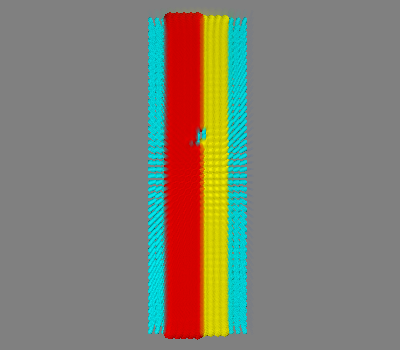

In [ ]:
mlab.clf()
mlab.view(azimuth=45, elevation=0, focalpoint='auto', roll=0)

data1, U, V, W = am.getScalarArray(4)
data2 = am.trackVector0(4, 3, 6)
x, y, z = np.mgrid[:int(am.xn / 4), :int(am.yn / 4), :int(am.zn / 4)]

mlab.points3d(x, y, z, data2, transparent=True)
mlab.points3d(x, y, z, data1, transparent=True, opacity=0.02)

In [ ]:
saveInd(0)

In [ ]:
def getBack3(X, Y, Z, d, count):
    points = []
    maxV = int(np.max(np.round(np.abs(d))))
    if maxV >= 0.001:
        for i in range( - 1, count):
            points.append(( - np.round(np.abs(d)) * np.sign(d)) / maxV * (maxV + i) + np.array([X, Y, Z]))
    
    maxV = int(np.max(np.ceil(np.abs(d))))
    if maxV >= 0.001:
        for i in range( - 1, count):
            points.append(( - np.ceil(np.abs(d)) * np.sign(d)) / maxV * (maxV + i) + np.array([X, Y, Z]))
    
    if len(points) == 0:
        return [np.array([X, Y, Z])]
    return points

t = []
for i in getBack3(9, 2, 2, np.array([3.1, 0.1, - 0.7]), 4):
    x = int(i[0])
    y = int(i[1])
    z = int(i[2])
    t.append([x, y, z])

print(t)

[[7, 2, 2], [6, 2, 3], [5, 2, 3], [4, 2, 3], [3, 2, 4], [6, 1, 2], [5, 1, 3], [4, 0, 3], [3, 0, 3], [2, 0, 3]]


In [ ]:
def getBack2(selfAM, prevAM, X, Y, Z):
    selfD = selfAM.groupData[X, Y, Z, 0 : 3]
    # maxV = max(abs(am.groupData[X, Y, Z, 0 : 3]))
    # direction = ( - am.groupData[X, Y, Z, 0 : 3]) if maxV == 0 else - am.groupData[X, Y, Z, 0 : 3] / maxV * step
    neigh = []
    for i in getBack3(X, Y, Z, selfD, 3):
        x = int(i[0])
        y = int(i[1])
        z = int(i[2])
        if x >= 0 and y >= 0 and z >= 0 and x < selfAM.xn and y < selfAM.yn and z < selfAM.zn and prevAM.groupData[x, y, z, 3] > 0:
            neigh.append([x, y, z, int(prevAM.groupData[x, y, z, 3])])
    return neigh

In [ ]:
def isSame2(selfAM, prevAM, X, Y, Z, checkCount, e, eScalar):
    mD = selfAM.groupData[X, Y, Z, 0 : 3]
    mScalar = selfAM.getScalar(X, Y, Z)
    # if mScalar < 0.229:
    if mScalar < 0.229:
        return 1
    neigh = getBack2(selfAM, prevAM, X, Y, Z)
    for n in neigh:
        nD = prevAM.groupData[n[0], n[1], n[2], 0 : 3]
        if nD[0] != 0:
            nD = nD * mD[0] / nD[0]
        elif nD[1] != 0:
            nD = nD * mD[1] / nD[1]
        elif nD[2] != 0:
            nD = nD * mD[2] / nD[2]
        nScalar = prevAM.getScalar(n[0], n[1], n[2])
        nFeature = int(prevAM.groupData[n[0], n[1], n[2], 3])
        du = abs(mD[0] - nD[0])
        dv = abs(mD[1] - nD[1])
        dw = abs(mD[2] - nD[2])
        dScalar = abs(mScalar - nScalar)
        # if du < e and dv < e and dw < e and ((mScalar < 1.042 and nScalar < 1.042) or (mScalar >= 1.042 and nScalar >= 1.042)) and nFeature > 1:
        if du < e and dv < e and dw < e and nFeature > 1:
        # if du < e and dv < e and dw < e and dScalar < eScalar and nFeature > 1:
            return nFeature
    # selfAM.features.append(len(selfAM.features) + 1)
    # return selfAM.features[len(selfAM.features) - 1]
    return 1

In [ ]:
def trackVector2(selfAM, prevAM, skip, countCheck, e, eScalar):
    selfAM.features = []
    for x in range(1, selfAM.xn):
        for y in range(selfAM.yn):
            for z in range(selfAM.zn):
                selfAM.groupData[x, y, z, 3] = isSame2(selfAM, prevAM, x, y, z, countCheck, e, eScalar)
    
    tD = np.zeros((int(selfAM.xn / skip), int(selfAM.yn / skip), int(selfAM.zn / skip)))
    tx = 0
    ty = 0
    tz = 0
    print(tD[0, 0, 0])
    for z in range(0, selfAM.zn, skip):
        for y in range(0, selfAM.yn, skip):
            for x in range(0, selfAM.xn, skip):
                t = selfAM.groupData[x, y, z, 3]
                tD[tx, ty, tz] = t
                tx = tx + 1
            tx = 0
            ty = ty + 1
        ty = 0
        tz = tz + 1
    return tD

In [ ]:
# read files grater than 2
def readNextFiles(i):
    ams[i] = read("/content/drive/MyDrive/ColabNotebooks/graphics/project/SquareCylinder/" + files[i] + ".am")
    ams[i].prepData()

In [ ]:
ams[3].groupData[50 : 67, 8 : 20, 24, 3]

array([[1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.]])

In [ ]:
ams[3].groupData[54 : 64, 8 : 20, 24, 0 : 3]

In [ ]:
ind = 0

3
0.0



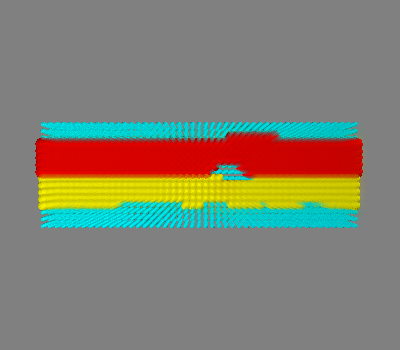

In [ ]:
ind = ind + 1
print(ind)
readNextFiles(ind)

mlab.clf()
mlab.view(azimuth=45, elevation=0, focalpoint='auto', roll=0)

data1, U, V, W = ams[ind].getScalarArray(4)
data2 = trackVector2(ams[ind], ams[ind - 1], 4, 3, 0.1, 0.295)
x, y, z = np.mgrid[:int(ams[ind].xn / 4), :int(ams[ind].yn / 4), :int(ams[ind].zn / 4)]

mlab.points3d(x, y, z, data2, transparent=True)
mlab.points3d(x, y, z, data1, transparent=True, opacity=0.02)

In [ ]:
for i in range(1, 70):
    ams[i] = None

In [ ]:
for i in range(80, 102):
    saveInd(i)

In [ ]:
for i in range(80, 102):
    readNextFiles(i)
    data2 = trackVector2(ams[i], ams[i - 1], 4, 3, 0.1, 0.295)
    # saveInd(i)
    print(i)

0.0
80
0.0
81
0.0
82
0.0
83
0.0
84
0.0
85
0.0
86
0.0
87
0.0
88
0.0
89
0.0
90
0.0
91
0.0
92
0.0
93
0.0
94
0.0
95
0.0
96
0.0
97
0.0
98
0.0
99
0.0
100
0.0
101


In [ ]:
def saveFeature(ind, fileName, scalarDataName, vectorDataName):
    data = '''# vtk DataFile Version 2.0\nVolume example\nASCII\nDATASET STRUCTURED_POINTS\nDIMENSIONS {} {} {}\nASPECT_RATIO 1 1 1\nORIGIN 0 0 0\nPOINT_DATA {}\nSCALARS {} float 1\nLOOKUP_TABLE default\n'''.format(am.xn, am.yn, am.zn, am.xn * am.yn * am.zn, scalarDataName)
    tD = [0 for i in range(ams[ind].xn * ams[ind].yn * ams[ind].zn)]
    tV = [0 for i in range(ams[ind].xn * ams[ind].yn * ams[ind].zn * 3)]
    tN = 0
    tVN = 0
    for z in range(ams[ind].zn):
        for y in range(ams[ind].yn):
            for x in range(ams[ind].xn):
                t = ams[ind].data[z][y][x]
                tS = ams[ind].getScalar(x, y, z)
                tD[tN] = "{:.2f}".format(ams[ind].groupData[x, y, z, 3] + (tS - ams[ind].minScalar) / (ams[ind].maxScalar - ams[ind].minScalar))
                tV[tVN] = "{:.2f}".format(t[0])
                tV[tVN + 1] = "{:.2f}".format(t[1])
                tV[tVN + 2] = "{:.2f}".format(t[2])
                tN = tN + 1
                tVN = tVN + 3
            # print(z, y)
    data = data + " ".join(tD)
    data = data + '''\nVECTORS {} float\n'''.format(vectorDataName)
    data = data + " ".join(tV)
    f = open(fileName, "w")
    f.write(data)
    f.close()

def saveInd(ind):
    saveFeature(ind, "/content/drive/MyDrive/ColabNotebooks/graphics/project/featureData/" + files[ind] + ".vtk", "feature_scalars", "volume_vectors")

In [ ]:
saveFeature("/content/drive/MyDrive/ColabNotebooks/graphics/project/featureData/flow_t0008_2.vtk", "feature_scalars", "volume_vectors")

In [ ]:
am.groupData[60 : 68, 26 : 36, 20 : 28, 3]

NameError: ignored

In [ ]:
X = 65
Y = 26
Z = 28
step = 3
maxV = max(abs(am.groupData[X, Y, Z, 0 : 3]))
direction = (- am.groupData[X, Y, Z, 0 : 3]) if maxV == 0 else - am.groupData[X, Y, Z, 0 : 3] / maxV * 3
lens = int(step * 2 + 1)
neigh = []
xs = int(int(direction[0]) - step + X)
ys = int(int(direction[1]) - step + Y)
zs = int(int(direction[2]) - step + Z)
print(xs, ys, zs, maxV, direction)
# for x in range(xs, xs + lens):
#     for y in range(ys, ys + lens):
#         for z in range(zs, zs + lens):
#             if x >= 0 and y >= 0 and z >= 0 and am.groupData[x, y, z, 3] > 0:
#                 neigh.append([x, y, z, int(am.groupData[x, y, z, 3])])
# return neigh

59 23 25 0.8411834239959717 [-3.00000000e+00  2.85723997e-01  1.00896457e-03]


In [ ]:
X = 65
Y = 26
Z = 28
neigh = getBack(X, Y, Z, 3)
print(neigh)
# mD = am.groupData[X, Y, Z, 0 : 3]
# mScalar = am.getScalar(X, Y, Z)
# for n in neigh:
#     nD = am.groupData[n[0], n[1], n[2], 0 : 3]
#     if nD[0] != 0:
#         nD = nD * mD[0] / nD[0]
#     elif nD[1] != 0:
#         nD = nD * mD[1] / nD[1]
#     elif nD[2] != 0:
#         nD = nD * mD[2] / nD[2]
#     nScalar = am.getScalar(n[0], n[1], n[2])
#     nFeature = int(am.groupData[n[0], n[1], n[2], 3])
#     du = abs(mD[0] - nD[0])
#     dv = abs(mD[1] - nD[1])
#     dw = abs(mD[2] - nD[2])
#     if du < e and dv < e and dw < e:
#         return nFeature

[[0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 2, 1], [0, 1, 3, 1], [0, 2, 1, 1], [0, 2, 2, 1], [0, 2, 3, 1], [0, 3, 1, 1], [0, 3, 2, 1], [0, 3, 3, 1]]


In [ ]:
data2.shape

(48, 16, 12)

In [ ]:
data2[16 : 28, 4 : 11, 4 : 9]

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [12., 12., 12., 12., 12.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.

In [ ]:
neigh = getBack(X, Y, Z, checkCount)
    mD = am.groupData[X, Y, Z, 0 : 3]
    mScalar = am.getScalar(X, Y, Z)
    for n in neigh:
        nD = am.groupData[n[0], n[1], n[2], 0 : 3]
        if nD[0] != 0:
            nD = nD * mD[0] / nD[0]
        elif nD[1] != 0:
            nD = nD * mD[1] / nD[1]
        elif nD[2] != 0:
            nD = nD * mD[2] / nD[2]
        nScalar = am.getScalar(n[0], n[1], n[2])
        nFeature = int(am.groupData[n[0], n[1], n[2], 3])
        du = abs(mD[0] - nD[0])
        dv = abs(mD[1] - nD[1])
        dw = abs(mD[2] - nD[2])
        if du < e and dv < e and dw < e:
            return nFeature

In [ ]:
am.features